In [ ]:
# Problem Statement: By the end of this guide, you'll have a solid foundation for 
# performing text classification on SMS messages to identify spam.

In [1]:
!pip install pandas matplotlib seaborn scikit-learn nltk

In [3]:
# Import library

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import nltk
from nltk.corpus import stopwords
import string
import re

In [4]:
file_path = r'C:\Users\IPCS\Desktop\Python\Datasets\SMSSpam'
#data = pd.read_csv(r"C:\Users\IPCS\Desktop\Python\Datasets\SMSSpam")
df = pd.read_csv(file_path, delimiter='\t', header=None, names=['label', 'message'])
df.head(5)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
print(df.shape)

(5572, 2)


In [5]:
# Check the Distribution of Labels (Spam vs Ham)
print(df['label'].value_counts())

label
ham     4825
spam     747
Name: count, dtype: int64


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


In [8]:
# Checking null value
print(df.isnull().sum())

label      0
message    0
dtype: int64


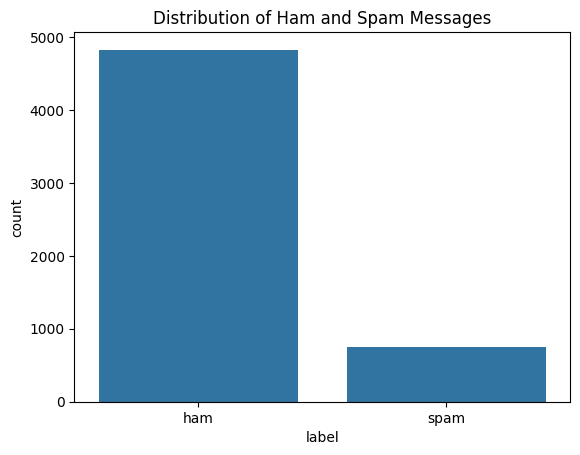

In [9]:
# Visulization
sns.countplot(x='label', data=df)
plt.title('Distribution of Ham and Spam Messages')
plt.show()

In [10]:
# Display a few spam and ham messages
print("Sample Spam Messages:")
print(df[df['label'] == 'spam']['message'].head())

print("\nSample Ham Messages:")
print(df[df['label'] == 'ham']['message'].head())


Sample Spam Messages:
2     Free entry in 2 a wkly comp to win FA Cup fina...
5     FreeMsg Hey there darling it's been 3 week's n...
8     WINNER!! As a valued network customer you have...
9     Had your mobile 11 months or more? U R entitle...
11    SIX chances to win CASH! From 100 to 20,000 po...
Name: message, dtype: object

Sample Ham Messages:
0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
6    Even my brother is not like to speak with me. ...
Name: message, dtype: object


In [11]:
# Data Preprocessing

/*
a) Text Cleaning Function
We'll define a function to clean the text by:

Lowercasing the text
Removing punctuation
Removing numbers
Removing stopwords
Removing extra whitespace
*/

SyntaxError: unmatched ')' (3282370891.py, line 4)

In [12]:
nltk.download('stopwords')
stop = stopwords.words('english')
stop

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\IPCS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [13]:
# Download NLTK stopwords if not already downloaded
nltk.download('stopwords')
stop = stopwords.words('english')

def clean_text(text):
    # Lowercase
    text = text.lower()
    
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove stopwords
    text = ' '.join(word for word in text.split() if word not in stop)
    
    # Remove extra whitespace
    text = text.strip()
    
    return text


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\IPCS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
# b) Apply Cleaning Function

# Apply the cleaning function to the message column
df['cleaned_message'] = df['message'].apply(clean_text)

# Display the first few cleaned messages
df[['message', 'cleaned_message']].head()


,message,cleaned_message
0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...
3,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though


In [15]:
# c) Encoding Labels

df['label_num'] = df['label'].map({'ham': 0, 'spam': 1})

# Verify the encoding
df[['label', 'label_num']].head()


,label,label_num
0,ham,0
1,ham,0
2,spam,1
3,ham,0
4,ham,0


In [16]:
df.head()

,label,message,cleaned_message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...,0
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...,1
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah dont think goes usf lives around though,0


In [17]:
!pip install wordcloud

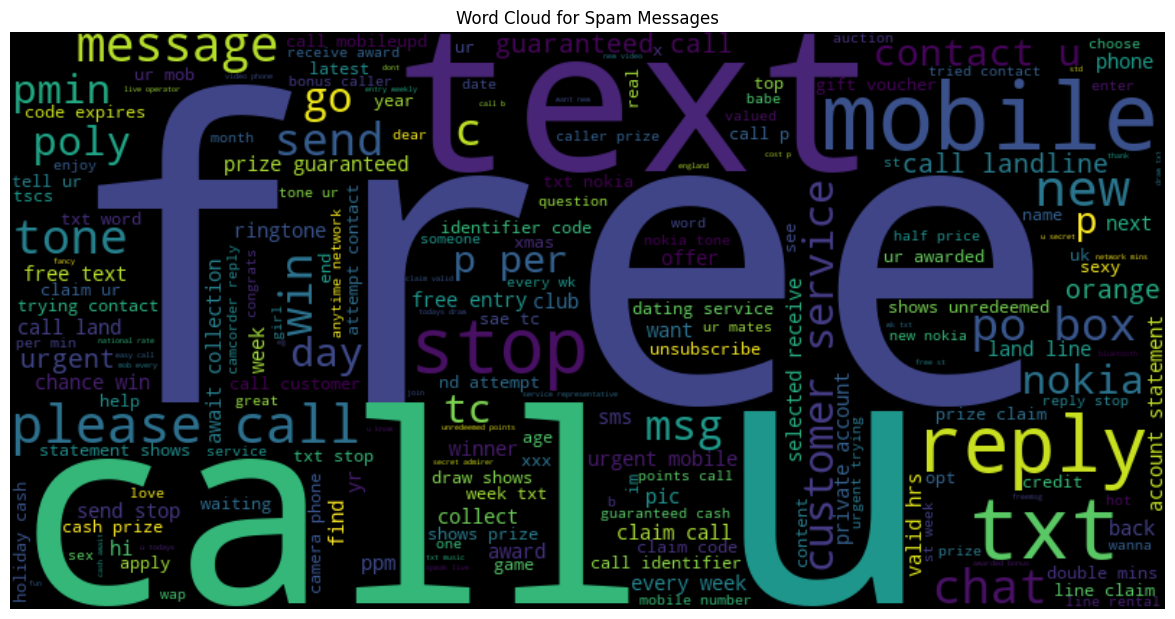

In [18]:
# Visualizing the Data
# a) Word Clouds
# Spam Messages:

from wordcloud import WordCloud

spam_messages = df[df['label'] == 'spam']['cleaned_message']
spam_text = ' '.join(spam_messages)

wordcloud_spam = WordCloud(width=800, height=400, background_color='black').generate(spam_text)

plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam Messages')
plt.show()

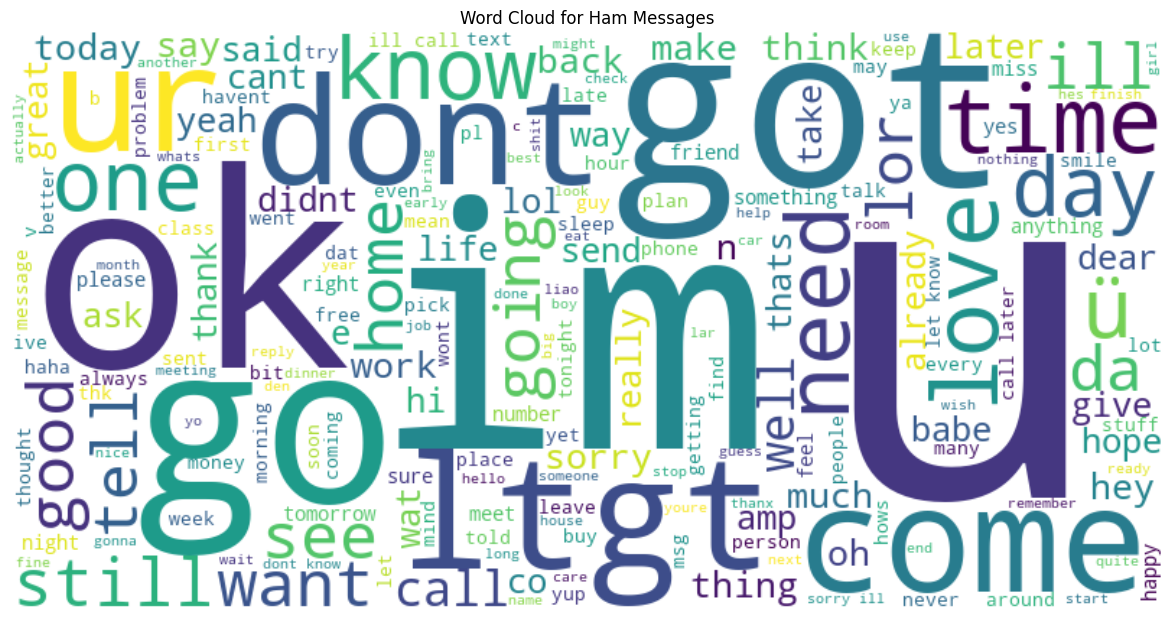

In [20]:
# Ham Messages:

ham_messages = df[df['label'] == 'ham']['cleaned_message']
ham_text = ' '.join(ham_messages)

wordcloud_ham = WordCloud(width=800, height=400, background_color='white').generate(ham_text)

plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud_ham, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Ham Messages')
plt.show()

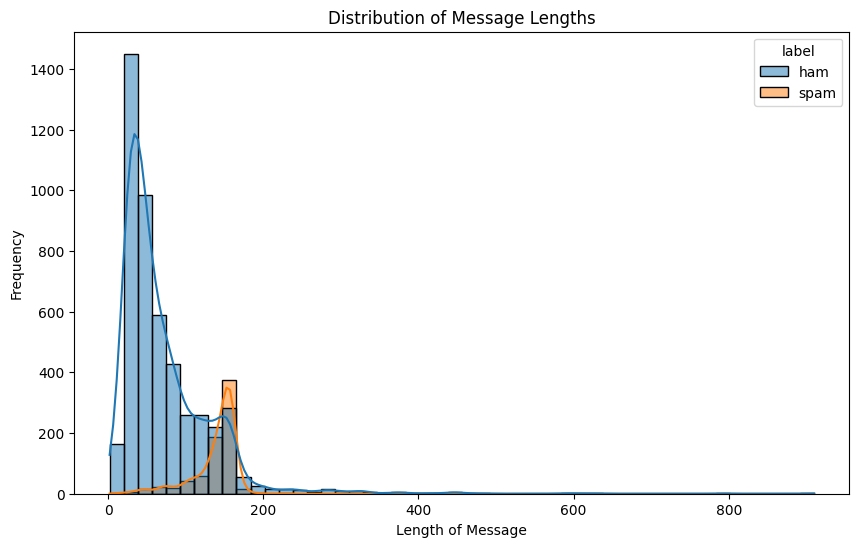

In [19]:
# b) Message Length Distribution

# Calculate message lengths
df['message_length'] = df['message'].apply(len)

# Plot distribution
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='message_length', hue='label', bins=50, kde=True)
plt.title('Distribution of Message Lengths')
plt.xlabel('Length of Message')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# Building a Spam Classifier Using Machine Learning
# We'll build a simple classifier using the Naive Bayes algorithm.

In [21]:
# a) Feature Extraction
# Convert text data into numerical features using TF-IDF.

# Initialize TF-IDF Vectorizer
tfidf = TfidfVectorizer()

# Fit and transform the cleaned messages
X = tfidf.fit_transform(df['cleaned_message'])

# Labels
y = df['label_num']

In [22]:
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 45680 stored elements and shape (5572, 8501)>

In [23]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: label_num, Length: 5572, dtype: int64

In [24]:
# b) Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# c) Model Training

# Initialize the Multinomial Naive Bayes classifier
model = MultinomialNB()

# Train the model
model.fit(X_train, y_train)


MultinomialNB()

In [26]:
# d) Making Predictions

# Predict on the test set
y_pred = model.predict(X_test)

In [27]:
print(y_pred)

[0 0 0 ... 0 0 0]


Accuracy: 96.95%

Classification Report:
              precision    recall  f1-score   support

         Ham       0.97      1.00      0.98       966
        Spam       1.00      0.77      0.87       149

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



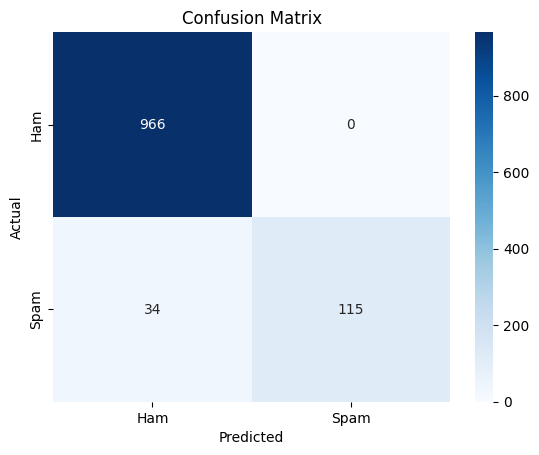

In [28]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [29]:
# Saving and Loading the Model

import joblib

# Save the model and the vectorizer
joblib.dump(model, 'spam_classifier_model.joblib')
joblib.dump(tfidf, 'tfidf_vectorizer.joblib')

# To load the model and vectorizer later:
# model = joblib.load('spam_classifier_model.joblib')
# tfidf = joblib.load('tfidf_vectorizer.joblib')


['tfidf_vectorizer.joblib']

In [31]:
# Making Predictions on New Messages

def predict_spam(message):
    # Clean the message
    cleaned = clean_text(message)
    
    # Vectorize the message
    vect = tfidf.transform([cleaned])
    
    # Predict
    prediction = model.predict(vect)[0]
    
    return 'Spam' if prediction == 1 else 'Ham'

# Example
new_message = "Congratulations! You've won a free ticket to Bahamas. Call now!"
# new_message = "You are the lucky winner of our international lottery draw! To claim your prize, please reply with your full name, address, and phone number. This is a limited-time offer, so act quickly!"
print(f"Message: {new_message}")
print(f"Prediction: {predict_spam(new_message)}")


Message: Congratulations! You've won a free ticket to Bahamas. Call now!
Prediction: Ham
